# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [5]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

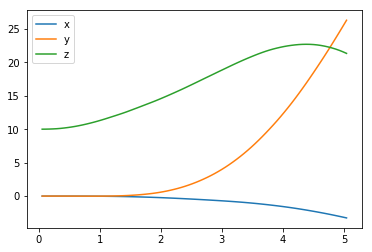

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

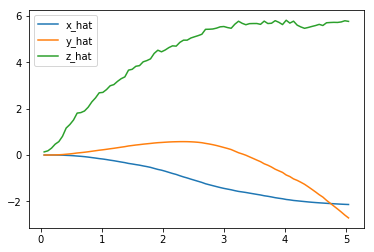

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

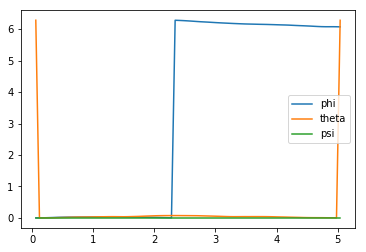

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

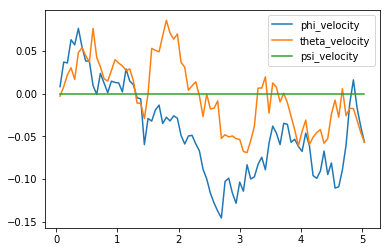

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

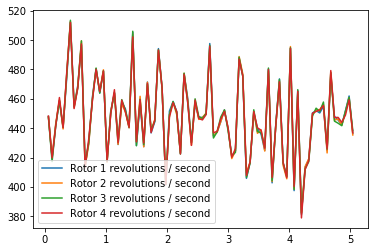

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [6]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -5.23686611e+00  -8.07378900e+00   3.10789412e+01   5.97077490e+00
   2.19498618e-02   0.00000000e+00]
[-3.00071484 -7.03479398  5.23863343]
[ 0.05153907 -0.13281895  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [7]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   1.139 (best =   1.199), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np

from agents.agent import Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])

task = Task(target_pos=target_pos)
agent = Agent(task)

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    if(agent.loop_breaker() and i_episode > 500):
        print("Outer loop was broken after {} episodes as rewards were steady.".format(i_episode))
        break
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            print("Reward after {} episode is {}".format(i_episode, agent.total_reward))
            break

Using TensorFlow backend.


Reward after 1 episode is 27.39050979803367
Reward after 2 episode is 27.385728269676587
Reward after 3 episode is 27.348882677862004
Reward after 4 episode is 26.00075965498992
Reward after 5 episode is 29.5975275557925
Reward after 6 episode is 29.03390596068921
Reward after 7 episode is 27.45712402377793
Reward after 8 episode is 37.4211363872328
Reward after 9 episode is 37.954411317464505
Reward after 10 episode is 38.24263579856675
Reward after 11 episode is 36.425031520067186
Reward after 12 episode is 36.373010722131895
Reward after 13 episode is 37.235704060977476
Reward after 14 episode is 38.14511351463667
Reward after 15 episode is 38.11611943676909
Reward after 16 episode is 36.249836041702984
Reward after 17 episode is 37.06907727973187
Reward after 18 episode is 37.90657102566428
Reward after 19 episode is 36.87134499401784
Reward after 20 episode is 36.85169289623932
Reward after 21 episode is 36.83823172026709
Reward after 22 episode is 36.29277864980614
Reward after 2

Reward after 180 episode is 30.589312326837977
Reward after 181 episode is 29.254834845298596
Reward after 182 episode is 29.252122081159435
Reward after 183 episode is 28.036645296878245
Reward after 184 episode is 29.255271601818468
Reward after 185 episode is 29.592972253892174
Reward after 186 episode is 29.23170432184476
Reward after 187 episode is 29.589501936622113
Reward after 188 episode is 29.241673518584975
Reward after 189 episode is 30.53038806730978
Reward after 190 episode is 29.548530065847906
Reward after 191 episode is 29.379504350699644
Reward after 192 episode is 29.252398688546766
Reward after 193 episode is 28.935994840046533
Reward after 194 episode is 29.245009259093408
Reward after 195 episode is 29.2413486528579
Reward after 196 episode is 29.600948784904002
Reward after 197 episode is 29.150481081564074
Reward after 198 episode is 30.280428645442672
Reward after 199 episode is 29.54562755211929
Reward after 200 episode is 29.255147345929224
Reward after 201 e

Reward after 356 episode is 29.219185067770994
Reward after 357 episode is 29.244174409691098
Reward after 358 episode is 29.22813522030848
Reward after 359 episode is 29.245706737410615
Reward after 360 episode is 29.246115267671634
Reward after 361 episode is 29.249311206088812
Reward after 362 episode is 29.23560606179187
Reward after 363 episode is 29.250209587610726
Reward after 364 episode is 29.230254470846038
Reward after 365 episode is 29.250985187452365
Reward after 366 episode is 29.235131025785833
Reward after 367 episode is 29.247978581687434
Reward after 368 episode is 29.247709033698865
Reward after 369 episode is 29.243276630824912
Reward after 370 episode is 29.24739501868576
Reward after 371 episode is 29.25579138099862
Reward after 372 episode is 29.247980603070133
Reward after 373 episode is 29.235325814383682
Reward after 374 episode is 29.234464924951
Reward after 375 episode is 29.24845100441096
Reward after 376 episode is 29.251283548470475
Reward after 377 epis

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

526


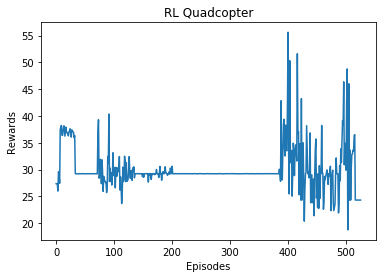

In [2]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
print(len(agent.rewards))
plt.plot(np.array(agent.rewards))
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title("RL Quadcopter")
plt.show()


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: This was a difficult part to say the least.I did a lot of reading around this one and listened to mamy suggestions.
So, my reward function is based on how much distance the copter is from it's targeted position. I used

1) Euclidean Distance between target and current position.

2) I clipped the reward from step 1 to [-500,500] (https://stackoverflow.com/questions/23128401/overflow-error-in-neural-networks-implementation)

3) Then I applied a slightly modified version of Sigmoid e^(x/4) just to smoothen a things bit.

The intution behind using sigmoid was that I had read on slack channel (an answer by alexis I guess) that DDPG Actor-critic method works well when rewards are between [-1,1] , I had thought of using tanh but it was pushing very small values like 10 to very near to 1. I wanted something smooth. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I first tried DQN as I had understood underlying structure very well. But soon I got stuck as I could not understand how would I map the discrete action space to continous action space. So I went to the Actor-Critic method that has been suggested. As I was drawing inspiration from policy_search.py, I had really hard time calculating agent's best score. Then I realized we are actually learning when there is enough data in the queue and episode finishing did not had much of the say in the training but I still went on to capture it just to see how well things are going. So,I kept on adding the rewards in the learn(). To later use them to plot.(Later discarded as I stored them again on episode basis)
gamma = 0.9, As I wanted a bit less number of rewards to be contributing in discounted returns.
alpha = 0.0001 , It worked for me. Rewards went steady and a bit higher than other values of alpha.

I also experimented with size of replay buffer and tau but the results were not as good. It seemed like rewards were converging too fast, thus I doubted if learning is even happening or not.

I used original DDPG Actor-Critic NN.
Actor - 3 Layers Relu Activation , outout is sigmoid activation.
Critic - 2 layers Relu, 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It was surely a difficult task to learn. While observing rewards in learn I could see that there were some moments where there was a sudden increase in reward function but it went back again in the further iterations. Also, sometimes there was an attack of Nan(Actually this made me thing about the reward function in a bit detail, thus I decided to use sigmoid)

It was a gradual learning curve in the beginning episodes things were a bit haywire but that was supposed to happen I guess.

I did not run for whole 1000 episodes as I had observed that rewards were converging. I had put a logic(loop_breaker) that if the difference of maximum and minimum of last ten rewards is less than 0.5(Some random threshold value), and if episode is more than 400(Agent got enough chance to learn), then I will stop learning, As I am assuming it will not learn more things. 

According to that my loop breaks at 526 iteration. And mean reward turns out to be 24.3, Though I had received higher rewards in between but I did nost stop as they were not stable(10 in a row)

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Hardest Part

It has to be designing of reward function, As in most of the previous lessons we had built algorithms (Q-Learning, TD) around the given environment it was hard to comprehend the idea of designing a reward function my ourselves. So yeah, Specifying the task was the hardest part. 

Getting started was a bit tough too but after doing many runs I could comprehend with the settings of the project.

So, I would say overall experience working with this project is that RL is a different beast altogether. I was so used to earlier structures of the projects where there was a well defined problem and we used Keras or TF to solve them. **But here we defined the problem and we solved it.**. So this one was difficult and vibrant community on slack and discussion forums helped me get through it. 